## ADAGRAD

In [4]:
import d2l
from mxnet import *
from mxnet.gluon import nn
npx.set_np()
import math

In [5]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 1, x1 -4.600000, x2 -1.600000
epoch 2, x1 -4.329178, x2 -1.350122
epoch 3, x1 -4.114228, x2 -1.163597
epoch 4, x1 -3.932302, x2 -1.014436
epoch 5, x1 -3.772835, x2 -0.890767
epoch 6, x1 -3.629933, x2 -0.785968
epoch 7, x1 -3.499909, x2 -0.695875
epoch 8, x1 -3.380281, x2 -0.617648
epoch 9, x1 -3.269280, x2 -0.549239
epoch 10, x1 -3.165593, x2 -0.489098
epoch 11, x1 -3.068216, x2 -0.436016
epoch 12, x1 -2.976356, x2 -0.389023
epoch 13, x1 -2.889378, x2 -0.347323
epoch 14, x1 -2.806763, x2 -0.310253
epoch 15, x1 -2.728078, x2 -0.277253
epoch 16, x1 -2.652960, x2 -0.247842
epoch 17, x1 -2.581099, x2 -0.221608
epoch 18, x1 -2.512228, x2 -0.198191
epoch 19, x1 -2.446117, x2 -0.177277
epoch 20, x1 -2.382563, x2 -0.158591


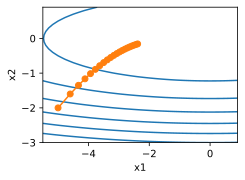

In [6]:
eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 1, x1 -3.000001, x2 -0.000000
epoch 2, x1 -1.971010, x2 -0.000000
epoch 3, x1 -1.330559, x2 -0.000000
epoch 4, x1 -0.907975, x2 -0.000000
epoch 5, x1 -0.622554, x2 -0.000000
epoch 6, x1 -0.427785, x2 -0.000000
epoch 7, x1 -0.294250, x2 -0.000000
epoch 8, x1 -0.202494, x2 -0.000000
epoch 9, x1 -0.139383, x2 -0.000000
epoch 10, x1 -0.095951, x2 -0.000000
epoch 11, x1 -0.066056, x2 -0.000000
epoch 12, x1 -0.045477, x2 -0.000000
epoch 13, x1 -0.031309, x2 -0.000000
epoch 14, x1 -0.021555, x2 -0.000000
epoch 15, x1 -0.014840, x2 -0.000000
epoch 16, x1 -0.010217, x2 -0.000000
epoch 17, x1 -0.007034, x2 -0.000000
epoch 18, x1 -0.004843, x2 -0.000000
epoch 19, x1 -0.003334, x2 -0.000000
epoch 20, x1 -0.002295, x2 -0.000000


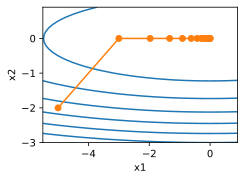

In [7]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [8]:
def init_adagrad_states(feature_dim):
    s_w = np.zeros((feature_dim, 1))
    s_b = np.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p,s in zip(params, states):
        s[:] += np.square(p.grad)
        p[:] -= hyperparams['lr'] * p.grad / np.sqrt(s + eps)

loss: 0.242, 0.058 sec/epoch


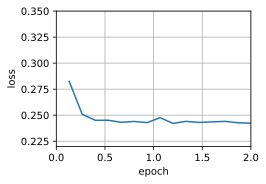

In [10]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
              {'lr':0.1}, data_iter, feature_dim);

loss: 0.242, 0.069 sec/epoch


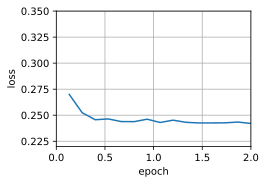

In [11]:
d2l.train_gluon_ch11('adagrad', {'learning_rate': 0.1}, data_iter)